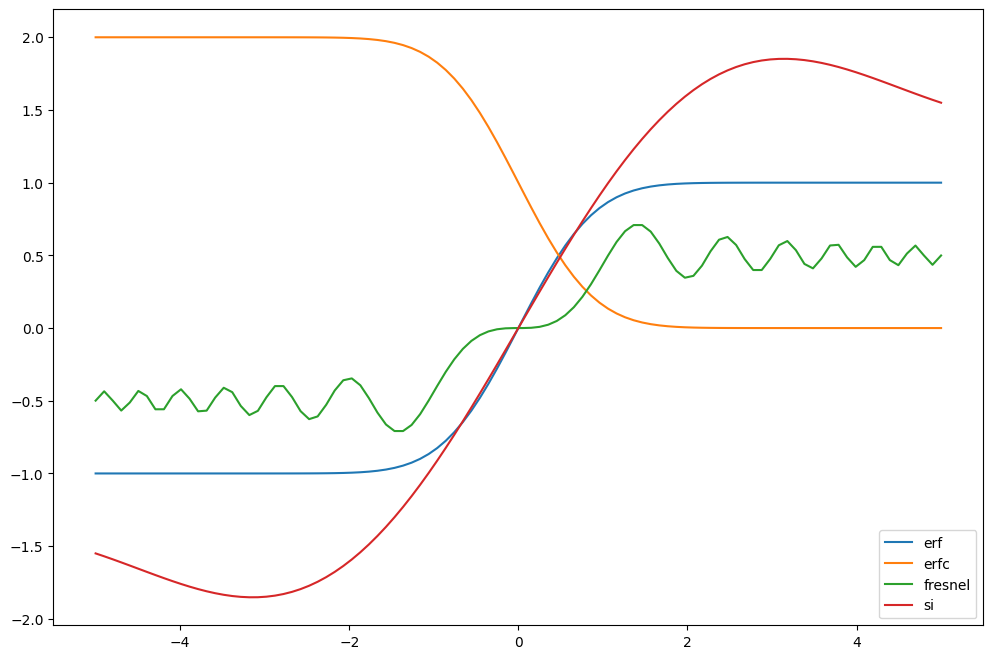

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfc, fresnel, sici

xs = np.linspace(-5, 5, 100)
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(xs, erf(xs), label="erf")
ax.plot(xs, erfc(xs), label="erfc")
ax.plot(xs, fresnel(xs)[0], label="fresnel")
ax.plot(xs, sici(xs)[0], label="si")
ax.legend(loc=0);

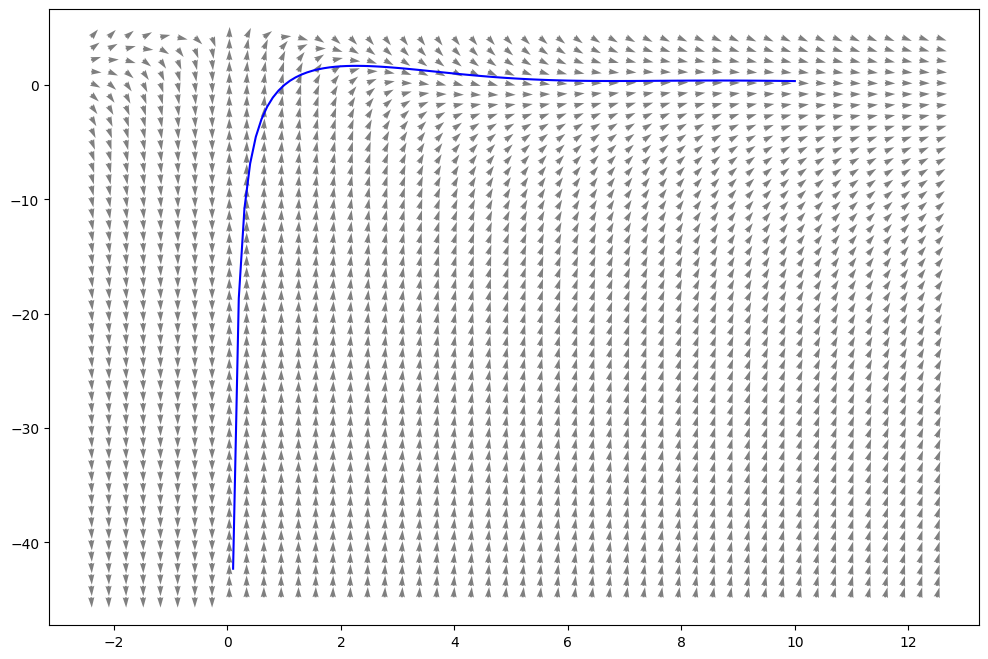

In [2]:
def plot_ivp(deriv_func, sol_func, x_min: float = -5.0, x_max: float = 5.0, pad: float = 2.5):
    xs = np.linspace(x_min, x_max, 100)
    ys = sol_func(xs)
    plt.figure(figsize=(12, 8))
    plt.plot(xs, ys, color="blue")

    xs = np.linspace(xs.min() - pad, xs.max() + pad, 50)
    ys = np.linspace(ys.min() - pad, ys.max() + pad, 50)
    X, Y = np.meshgrid(xs, ys)
    derivs = deriv_func(X, Y)
    angles = np.atan2(derivs, np.ones_like(derivs))
    deriv_xs = np.cos(angles)
    deriv_ys = np.sin(angles)
    plt.quiver(X, Y, deriv_xs, deriv_ys, alpha=0.5)

# 1. dy/dx = (5sin(x) - xy) / x^2
def deriv1(x, y):
    return (5*np.sin(x) - x*y) / (x*x)

def func1(x):
    return (5/x) * (sici(x)[0] - sici(1.0)[0])

plot_ivp(deriv1, func1, x_min=0.1, x_max=10)

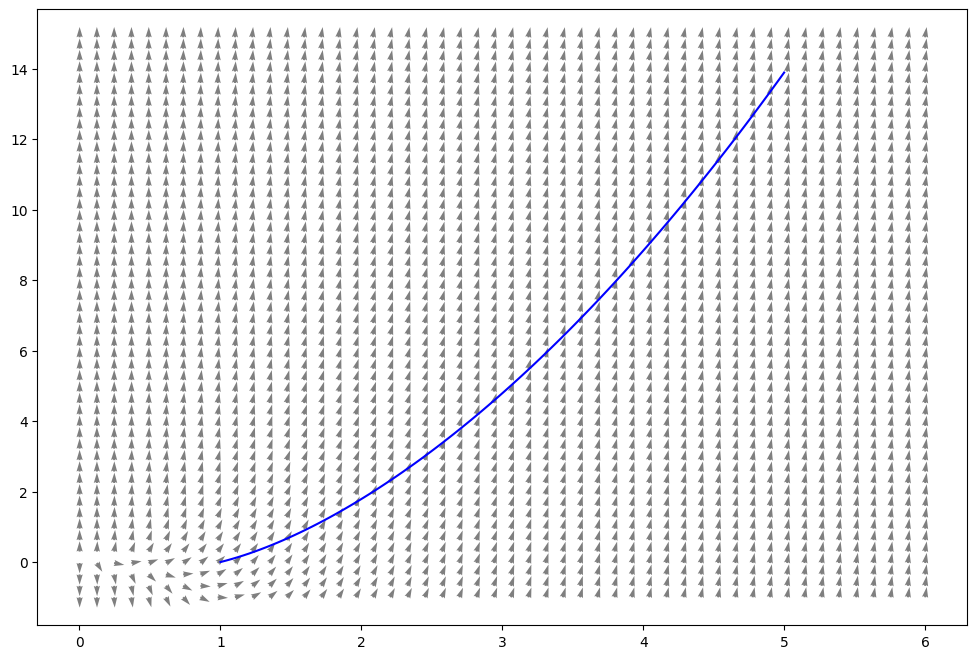

In [3]:
from scipy import integrate

# 2. dy/dx = x + (y / x^2)
def deriv2(x, y):
    return x + (y / (x*x))

def func2(xs):
    ys = np.empty_like(xs)
    for i, x in enumerate(xs):
        ys[i] = np.exp(-1/x) * integrate.quad(lambda t: t * np.exp(1/t), 1, x)[0]
    return ys

plot_ivp(deriv2, func2, x_min=1.001, x_max=5, pad=1)

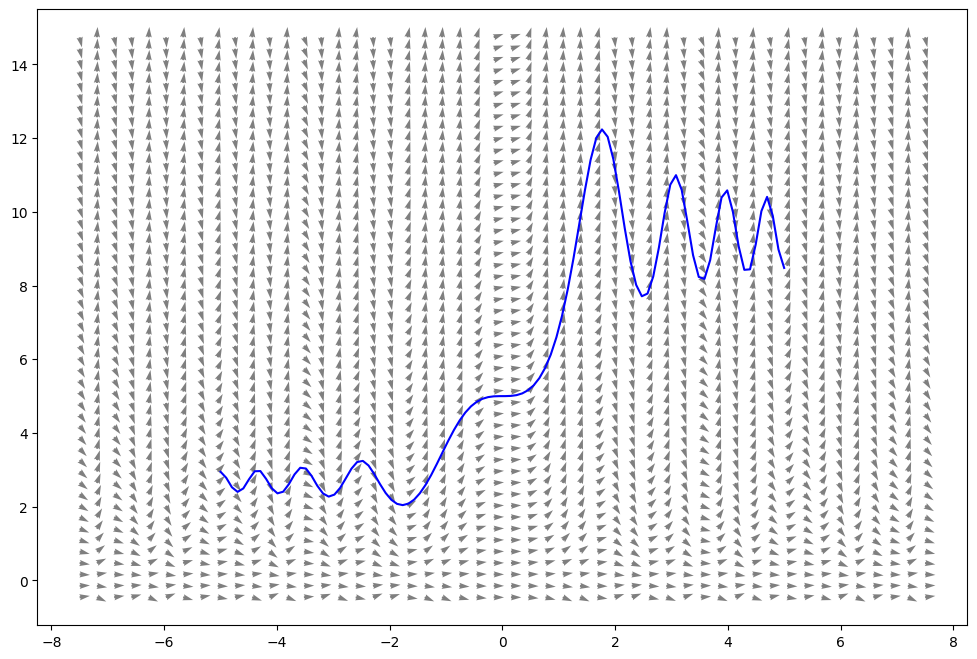

In [4]:
# 3. dy/dx = sin(x^2)y
def deriv3(x, y):
    return np.sin(x*x) * y

def func3(x):
    a = (np.pi / 2) ** 0.5
    return 5 * np.exp(a * fresnel(x / a)[0])

plot_ivp(deriv3, func3)